# Introduction to NumPy

Lots of these notes are from Chapter 2 of VanderPlas -- you should definitely go through his chapter carefully.  I will use the book notes and these in class.

The NumPy documentation: https://numpy.org/doc/stable

In [1]:
# import the NumPy module and display the version number
import numpy as np
np.__version__

'1.18.5'

In [2]:
# Build-in documentation
# np.<TAB> in IPython
np?

In [3]:
# see the things in the np namespace
dir(np)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__dir__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__git_revision__',
 '__loader__',
 '__mkl_version__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_ad

In [4]:
# Create a function to display the array attributes and data (optinally).  
#  Note the use of the default value for the show_data parameter.  Made
#  this part of the display optional (and off by default) to support large
#  arrays (that you wouldn't want to try to show explicitly)
def show(the_array, show_data = 0):
    print("  Dimension: {:}".format(the_array.ndim))
    print("       Size: {:}".format(the_array.size))
    print("      Shape: {:}".format(the_array.shape))    
    print("  Data Type: {:}".format(the_array.dtype))    
    print("  Item Size: {:}".format(the_array.itemsize))
    print("Data Buffer: {:}".format(the_array.data))
    if show_data:
        print("The data:")
        print(the_array)

print("Example function call:")
show(np.array([1, 2, 3, 4, 5]),1)

Example function call:
  Dimension: 1
       Size: 5
      Shape: (5,)
  Data Type: int32
  Item Size: 4
Data Buffer: <memory at 0x000001F1C1D34A00>
The data:
[1 2 3 4 5]


## NumPy Arrays
### Creating Arrays and Accessing Elements

In [5]:
# Create a NumPy array from a list
a = np.array([1.5, 0.7, 22.4])
show(a, 1)

  Dimension: 1
       Size: 3
      Shape: (3,)
  Data Type: float64
  Item Size: 8
Data Buffer: <memory at 0x000001F1C1D34D00>
The data:
[ 1.5  0.7 22.4]


In [6]:
# Create a NumPy array from a list and specify the data type
a = np.array([1.5, 0.7, 22.4], dtype="int32")
show(a, 1)

  Dimension: 1
       Size: 3
      Shape: (3,)
  Data Type: int32
  Item Size: 4
Data Buffer: <memory at 0x000001F1C1D34A00>
The data:
[ 1  0 22]


In [7]:
# The second element (zero-based, so it's index 1)
a[1]

0

In [8]:
# Multi-dimensional array.  Note that NumPy arrays are homogenous -- all
#   elements are the same data type (dtype) -- integers in this case
b = np.array(
    [ [1,  2,  3,  4,   5]
     ,[6,  7,  8,  9,  10]
     ,[11, 12, 13, 14, 15] ] )
show(b, 1)

  Dimension: 2
       Size: 15
      Shape: (3, 5)
  Data Type: int32
  Item Size: 4
Data Buffer: <memory at 0x000001F1C1DCB6C0>
The data:
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]


In [9]:
# the (i, j)the element
i = 2
j = 3
b[i, j]

14

In [10]:
# Note that if one elements is a float, all will be upcast since
# NumPy arrays are homogeneous
b = np.array(
    [ [1.0,  2,  3,  4,   5]
     ,[6,  7,  8,  9,  10]
     ,[11, 12, 13, 14, 15] ] )
show(b,1)
# since Python lists are heterogeneous (in data types), there
# is no upcasting and a similar definition would have a list of lists
# with 1 float and the rest integers.

  Dimension: 2
       Size: 15
      Shape: (3, 5)
  Data Type: float64
  Item Size: 8
Data Buffer: <memory at 0x000001F1C1DCB6C0>
The data:
[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]]


In [11]:
# zeros function to create and array and initialize with zeros. Ones() works similarly.
# Note that you can also specify the data type.  Also note that with some
# datatype (e.g. float32), you seem to need to quote the type.
c = np.zeros((3, 8), dtype=int)
show(c, 1)

  Dimension: 2
       Size: 24
      Shape: (3, 8)
  Data Type: int32
  Item Size: 4
Data Buffer: <memory at 0x000001F1C1DCB6C0>
The data:
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [12]:
# full() for arbitrary values
c = np.full((3, 3, 3), 82.6)
show(c, 1)

  Dimension: 3
       Size: 27
      Shape: (3, 3, 3)
  Data Type: float64
  Item Size: 8
Data Buffer: <memory at 0x000001F1C1DD4310>
The data:
[[[82.6 82.6 82.6]
  [82.6 82.6 82.6]
  [82.6 82.6 82.6]]

 [[82.6 82.6 82.6]
  [82.6 82.6 82.6]
  [82.6 82.6 82.6]]

 [[82.6 82.6 82.6]
  [82.6 82.6 82.6]
  [82.6 82.6 82.6]]]


In [13]:
# Create a NumPy array and initialize it with integers from 0 - 14 using
#   the arange() function.
a = np.arange(15)
show(a, 1)

  Dimension: 1
       Size: 15
      Shape: (15,)
  Data Type: int32
  Item Size: 4
Data Buffer: <memory at 0x000001F1C1D34AC0>
The data:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [14]:
# Create the same array, but used floats and then reshape it to a 3x5 matrix (a 
#   2-dimensional array, technically)
a = np.arange(15, dtype=float).reshape(3,5)
show(a, 1)

  Dimension: 2
       Size: 15
      Shape: (3, 5)
  Data Type: float64
  Item Size: 8
Data Buffer: <memory at 0x000001F1C1DCB6C0>
The data:
[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]]


In [15]:
# Create a 20-element array of floats form 0 - 19 and reshape it to a 5x4 array.
# Note that we create an anonymous array and send that to
# the show() function.  The structure will be garbage-collected
# after the function call since it is anonymous.
show(np.arange(20.0).reshape(5,4), 1)

  Dimension: 2
       Size: 20
      Shape: (5, 4)
  Data Type: float64
  Item Size: 8
Data Buffer: <memory at 0x000001F1C1DCB6C0>
The data:
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]
 [16. 17. 18. 19.]]


In [16]:
# Use a comprehension - From VanderPlas
# Nested lists result in multi-dimensional arrays
n = np.array([range(i, i + 3) for i in [2, 4, 6]])
show(n, 1)

  Dimension: 2
       Size: 9
      Shape: (3, 3)
  Data Type: int32
  Item Size: 4
Data Buffer: <memory at 0x000001F1C1DCB930>
The data:
[[2 3 4]
 [4 5 6]
 [6 7 8]]


In [17]:
# Show the details of what's going in the above assignment statement.
# First the inner comprehension
t = [range(i, i + 3) for i in [2, 4, 6]]
t

[range(2, 5), range(4, 7), range(6, 9)]

In [18]:
# Next create the NumPy array using the list created
# by the comprehension
np.array(t)

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [19]:
# Create a 3x3 array of normally distributed random values
# with mean 96 and standard deviation 14
c = np.random.normal(96, 14, (3, 3))
show(c,1)

  Dimension: 2
       Size: 9
      Shape: (3, 3)
  Data Type: float64
  Item Size: 8
Data Buffer: <memory at 0x000001F1C1DCBEE0>
The data:
[[ 58.88783065  92.07763252  83.99182515]
 [ 98.76902317  88.30521344 112.95504341]
 [ 94.92224137  96.99589401  94.96118983]]


In [20]:
# Some more samples from VanderPlas
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

In [21]:
# Iterating through a Python list of NumPy arrays.
al = [x1, x2, x3]
for a in al:
    show(a, 1)
    print("")

  Dimension: 1
       Size: 6
      Shape: (6,)
  Data Type: int32
  Item Size: 4
Data Buffer: <memory at 0x000001F1C1D34880>
The data:
[5 0 3 3 7 9]

  Dimension: 2
       Size: 12
      Shape: (3, 4)
  Data Type: int32
  Item Size: 4
Data Buffer: <memory at 0x000001F1C1DCBD40>
The data:
[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]

  Dimension: 3
       Size: 60
      Shape: (3, 4, 5)
  Data Type: int32
  Item Size: 4
Data Buffer: <memory at 0x000001F1C1DD4310>
The data:
[[[8 1 5 9 8]
  [9 4 3 0 3]
  [5 0 2 3 8]
  [1 3 3 3 7]]

 [[0 1 9 9 0]
  [4 7 3 2 7]
  [2 0 0 4 5]
  [5 6 8 4 1]]

 [[4 9 8 1 1]
  [7 9 9 3 6]
  [7 2 0 3 5]
  [9 4 4 6 4]]]



In [22]:
# Element (1, 2, 3) from x3
x3[1, 2, 3]

4

In [23]:
# flatten a multi-dimensional array
show(x3.flatten(), 1)

  Dimension: 1
       Size: 60
      Shape: (60,)
  Data Type: int32
  Item Size: 4
Data Buffer: <memory at 0x000001F1C1D34940>
The data:
[8 1 5 9 8 9 4 3 0 3 5 0 2 3 8 1 3 3 3 7 0 1 9 9 0 4 7 3 2 7 2 0 0 4 5 5 6
 8 4 1 4 9 8 1 1 7 9 9 3 6 7 2 0 3 5 9 4 4 6 4]


In [24]:
# NumPy arrays are mutable.
x2[0,0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [25]:
# Note the behavior when we try to assign a different data type ...
x2[1, 1] = 7.325
show(x2,1)

  Dimension: 2
       Size: 12
      Shape: (3, 4)
  Data Type: int32
  Item Size: 4
Data Buffer: <memory at 0x000001F1C1DCBD40>
The data:
[[12  5  2  4]
 [ 7  7  8  8]
 [ 1  6  7  7]]


### More on reshaping and np.newaxis

In [26]:
x = np.array([1, 2, 3])
x

array([1, 2, 3])

In [27]:
# What is the difference between x and y?
y = x.reshape((1,3))
y

array([[1, 2, 3]])

In [28]:
# What is the difference between y and z?
z = x.reshape((3,1))
z

array([[1],
       [2],
       [3]])

In [29]:
x.shape, y.shape,z.shape

((3,), (1, 3), (3, 1))

In [30]:
x[np.newaxis, :]

array([[1, 2, 3]])

In [31]:
x[:,np.newaxis]

array([[1],
       [2],
       [3]])

In [32]:
a = np.arange(27).reshape((3,3,3))
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [33]:
a = np.arange(81).reshape((3,3,3,3))
a

array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]],


       [[[27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],

        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53]]],


       [[[54, 55, 56],
         [57, 58, 59],
         [60, 61, 62]],

        [[63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80]]]])

 ### Slices - Views and copies
 
 Slice: [i:j:k] - start:stop:stride (for each axis)

In [34]:
# slice example - upper-left 2x3 sub-matrix
# :2 - rows 0, 1
# :3 - columns 0, 1, 2
x2[:2, :3]

array([[12,  5,  2],
       [ 7,  7,  8]])

In [35]:
# lower right 2x3
x2[-2:, -3:]

array([[7, 8, 8],
       [6, 7, 7]])

In [36]:
# middle 1x2
x2[1:-1, 1:-1]

array([[7, 8]])

In [37]:
# note that slices are (by default) views of the array, not copies.
x = x2[:2, :3]
x, x2

(array([[12,  5,  2],
        [ 7,  7,  8]]),
 array([[12,  5,  2,  4],
        [ 7,  7,  8,  8],
        [ 1,  6,  7,  7]]))

In [38]:
x[0, 0] = 477
x, x2

(array([[477,   5,   2],
        [  7,   7,   8]]),
 array([[477,   5,   2,   4],
        [  7,   7,   8,   8],
        [  1,   6,   7,   7]]))

In [39]:
# If you want a copy, rather than a view, use the copy() function.
x = x2[:2, :3].copy()
x[0, 0] = 976
x, x2

(array([[976,   5,   2],
        [  7,   7,   8]]),
 array([[477,   5,   2,   4],
        [  7,   7,   8,   8],
        [  1,   6,   7,   7]]))

## Array Concatenation and Splitting - VP 02.02

## Universal Functions and the Slowness of Loops - VP 02.03

## Monte Carlo Example

## Axes and Aggregate Functions

In [40]:
a = np.random.normal(5, 1, (5, 3))
show(a, 1)

  Dimension: 2
       Size: 15
      Shape: (5, 3)
  Data Type: float64
  Item Size: 8
Data Buffer: <memory at 0x000001F1C1DCBC70>
The data:
[[6.25441407 6.41910204 4.25614392]
 [2.4825629  3.49290398 6.14907613]
 [3.80642175 6.14104245 6.50944508]
 [6.06777513 4.31341052 5.01487332]
 [4.6243341  4.96177636 5.36797447]]


In [41]:
# Overall sum -- all elements of the array
a.sum()

75.861256210341

In [42]:
# Sum along an axis
a.sum(axis=0)

array([23.23550795, 25.32823535, 27.29751291])

In [43]:
# Sum along the other axis
a.sum(axis=1)

array([16.92966003, 12.124543  , 16.45690928, 15.39605897, 14.95408494])

In [44]:
# the average of the 3rd column
a.mean(axis=0)[2]

5.459502582996934

In [45]:
# or
ax = 0
a.sum(axis=ax)[2]/a.shape[ax]

5.459502582996934

In [46]:
# average of the 4th row
a.mean(axis=1)[3]

5.132019656109631

In [47]:
# or
ax = 1
a.sum(axis=ax)[3]/a.shape[ax]

5.132019656109631

In [48]:
b = np.random.randint(1, 6, (3, 4, 6))
show(b, 1)

  Dimension: 3
       Size: 72
      Shape: (3, 4, 6)
  Data Type: int32
  Item Size: 4
Data Buffer: <memory at 0x000001F1C08E18B0>
The data:
[[[4 3 2 3 4 4]
  [4 3 4 5 2 3]
  [4 2 3 2 5 3]
  [4 1 4 3 4 1]]

 [[1 1 4 3 4 1]
  [5 1 1 3 4 3]
  [4 1 1 1 4 1]
  [3 3 1 5 4 5]]

 [[1 5 4 4 5 2]
  [4 1 1 1 2 1]
  [5 2 4 2 1 1]
  [5 4 4 2 1 1]]]


In [49]:
# Mean of the "planes"
b.mean(axis=0)

array([[2.        , 3.        , 3.33333333, 3.33333333, 4.33333333,
        2.33333333],
       [4.33333333, 1.66666667, 2.        , 3.        , 2.66666667,
        2.33333333],
       [4.33333333, 1.66666667, 2.66666667, 1.66666667, 3.33333333,
        1.66666667],
       [4.        , 2.66666667, 3.        , 3.33333333, 3.        ,
        2.33333333]])

In [50]:
# Mean of the ?
b.mean(axis=1)

array([[4.  , 2.25, 3.25, 3.25, 3.75, 2.75],
       [3.25, 1.5 , 1.75, 3.  , 4.  , 2.5 ],
       [3.75, 3.  , 3.25, 2.25, 2.25, 1.25]])

In [51]:
# Mean of the ?
b.mean(axis=2)

array([[3.33333333, 3.5       , 3.16666667, 2.83333333],
       [2.33333333, 2.83333333, 2.        , 3.5       ],
       [3.5       , 1.66666667, 2.5       , 2.83333333]])

## Example with A Dataset from a CSV file

In [52]:
# erv.csv data - a (100x15 matrix of floats)
erv = np.genfromtxt('..\data\erv.csv', delimiter=',')
show(erv)

  Dimension: 2
       Size: 1500
      Shape: (100, 15)
  Data Type: float64
  Item Size: 8
Data Buffer: <memory at 0x000001F1C1E7B040>


In [53]:
# show a sample - upper left 5x5 (first five columns of the first 5 rows)
for r in erv[:5, :5]:
    print(r)

[ 0.22  5.36  1.98 35.32 48.09]
[  3.99   4.78   1.22  29.07 109.35]
[20.66  7.76 36.47 39.85 38.02]
[  5.59   4.76  28.7   34.22 134.96]
[  1.62  90.95  29.76 107.63  11.08]


In [54]:
# Use the aggregate sum to find the column averages in one statement.
erv.mean(axis=0)

array([  9.2296,  21.6065,  28.6991,  36.4711,  48.6776,  54.2314,
        79.2063,  77.4339,  85.6077, 112.5114, 105.0612, 123.1152,
       131.3249, 132.1598, 156.4597])

In [55]:
# row averages
erv.mean(axis=1)

array([ 78.02866667,  92.166     ,  73.764     ,  57.00933333,
        59.876     , 124.12333333,  85.378     ,  65.43266667,
        46.35133333, 136.89133333,  88.27533333,  75.19666667,
        54.752     ,  87.37733333,  36.92733333,  78.30266667,
        72.09266667, 128.402     ,  51.75933333,  60.85733333,
        77.50666667,  57.668     ,  81.382     ,  77.04      ,
        70.62      ,  68.06133333,  84.17      ,  63.65133333,
        85.58666667,  55.446     , 141.91866667,  57.30133333,
        72.02466667, 127.31466667,  73.38733333,  98.86866667,
        66.636     ,  50.06066667,  57.06666667,  94.158     ,
       110.21866667,  74.77333333,  75.82733333,  57.77066667,
        87.88333333,  83.04466667,  67.39      , 141.96666667,
        62.26      ,  80.422     ,  95.04733333,  51.626     ,
        93.442     ,  78.08333333,  71.58466667,  60.48733333,
        66.062     ,  68.28533333,  57.32933333,  94.45733333,
        86.84866667,  53.53733333, 107.23066667,  39.38

In [56]:
# Load matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

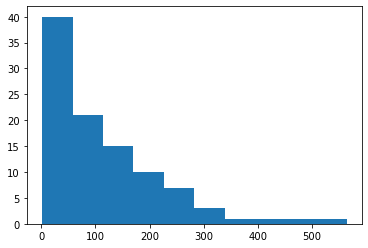

In [57]:
# Show a histogram of the jth column (j between 0 and 14)
j = 9
plt.hist(erv[:,j])
plt.show()

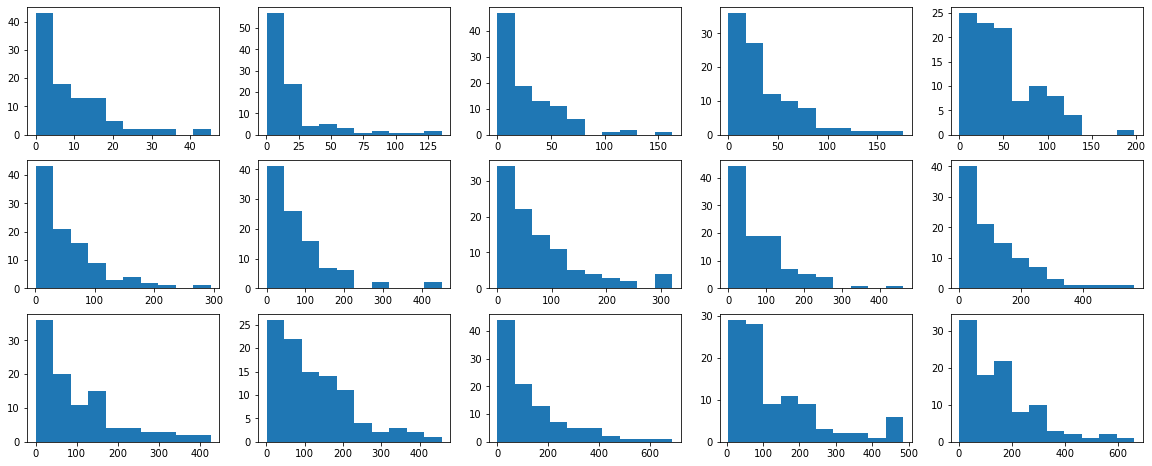

In [58]:
# show histograms of all 15 columns in a single plot
plt.figure(figsize=(20, 8))
for j in range(1, 16):
    plt.subplot(3,5,j)
    plt.hist(erv[:,j-1])
plt.show()

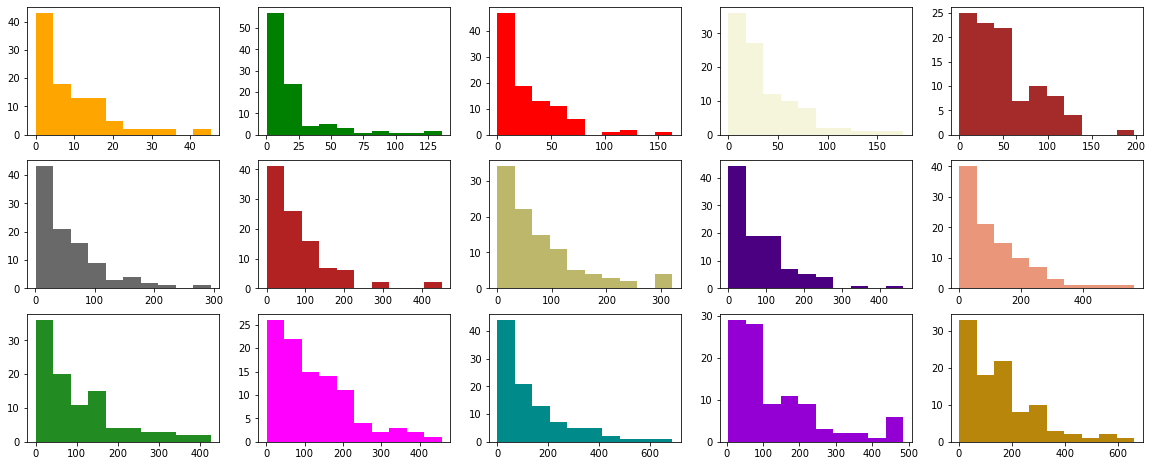

In [59]:
# or with color
c = ['orange', 'green', 'red', 'beige', 'brown'
    ,'dimgray', 'firebrick', 'darkkhaki', 'indigo', 'darksalmon'
    ,'forestgreen', 'fuchsia', 'darkcyan', 'darkviolet','darkgoldenrod'
    ]
plt.figure(figsize=(20, 8))
for j in range(15):
    plt.subplot(3,5,j+1)
    plt.hist(erv[:,j], color=c[j])
plt.show()

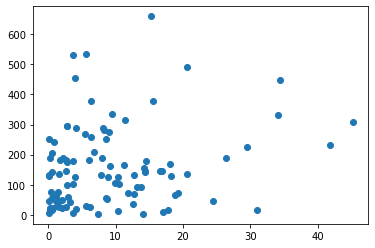

In [60]:
# Scatter plot of column col1 vs column col2
col1 = 0
col2 = 14
plt.scatter(erv[:, col1], erv[:, col2]);

In [61]:
plt.scatter?